In [42]:
# Step 1 >> import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
# Step 2 >> Problem Statement
# Dataset information i.e project description
# here we can find Target Variable & Independant Varible

In [4]:
# Step 3 >> Data Collection
# Collection from Cloud in the form of CSV, Excel, SqLite form
# Collection from Kaggle for personal Project


In [24]:
# Step 4 >> Data Preprocessing
df = pd.read_csv('autos_dataset.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [25]:
df.shape

(205, 26)

In [26]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [28]:
df.drop(['body-style','drive-wheels','engine-location','engine-type','fuel-system','engine-type','bore','stroke'],axis=1,inplace=True)

In [29]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
wheel-base,88.6,88.6,94.5,99.8,99.4
length,168.8,168.8,171.2,176.6,176.6
width,64.1,64.1,65.5,66.2,66.4
height,48.8,48.8,52.4,54.3,54.3


In [33]:
correlation = df.corr()
correlation

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
wheel-base,88.6,88.6,94.5,99.8,99.4
length,168.8,168.8,171.2,176.6,176.6
width,64.1,64.1,65.5,66.2,66.4
height,48.8,48.8,52.4,54.3,54.3


In [37]:
df.replace('?',np.nan, inplace=True) # Remove questionmark and replace by non-num value
df.drop(['normalized-losses','make','fuel-type','num-of-doors','aspiration','num-of-cylinders','peak-rpm','horsepower'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   compression-ratio  205 non-null    float64
 8   city-mpg           205 non-null    int64  
 9   highway-mpg        205 non-null    int64  
 10  price              201 non-null    object 
dtypes: float64(5), int64(5), object(1)
memory usage: 17.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel-base   205 non-null    float64
 1   length       205 non-null    float64
 2   width        205 non-null    float64
 3   curb-weight  205 non-null    int64  
 4   engine-size  205 non-null    int64  
 5   city-mpg     205 non-null    int64  
 6   highway-mpg  205 non-null    int64  
 7   price        205 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 12.9 KB


<AxesSubplot:>

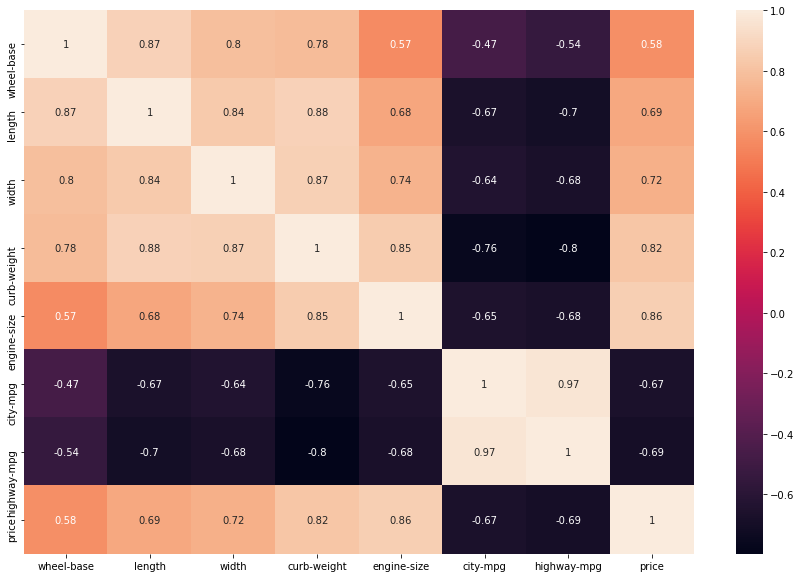

In [69]:
df['price'] = df['price'].astype('float64')
df['price'] = df['price'].fillna(df['price'].median())
df.info()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [45]:
df.drop(['symboling','height','compression-ratio'],axis=1,inplace=True)

In [94]:
y = df[['price']]
x = df[['engine-size','curb-weight','width']]

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [96]:
model = LinearRegression()

In [97]:
model.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred = model.predict(x_test)

In [99]:
y_test.head(2)

,price
78,6669.0
97,7999.0


In [100]:
y_pred[:2]

array([[6617.46211276],
       [7134.14023833]])

In [101]:
r2 = r2_score(y_test,y_pred)
r2

0.7337747041746012

In [102]:
mean_squared_error(y_test,y_pred)

14583423.088286266

In [103]:
m_values = model.coef_
m_values

array([[116.51257088,   3.41671249, 297.72706812]])

In [104]:
intercept = model.intercept_
intercept

array([-30122.40941708])